Подключение необходимых библиотек:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import ndcg_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### Шаг 1: Подготовка и проверка датасета



1. **Загрузка данных**: Начнем с загрузки данных из файла intern_task.csv и ознакомления с его структурой и содержимым.


In [2]:
df = pd.read_csv('intern_task.csv')
df.head()

,rank,query_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143
0,0,10,1.0,0.0,1.0,3.0,3.0,0.333333,0.0,0.333333,...,0.0,0.000000,0.454545,0.890238,8.655534,1.000000,0.077778,0.002222,1.0,0.333333
1,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.773976,23.130514,0.000000,0.027826,0.000430,44.0,14.666667
2,0,10,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,0.0,0.000000,0.000000,0.918308,13.351339,0.000000,0.014925,0.000104,22.0,7.333333
3,1,10,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.975355,18.240926,0.000000,0.053140,0.000255,8.0,2.666667
4,2,10,3.0,0.0,3.0,1.0,3.0,1.000000,0.0,1.000000,...,273.0,79.670665,0.200000,0.990119,31.786048,0.333333,0.046512,0.000307,24.0,8.000000


2. **Изучение данных**: Проанализируем основные статистики данных, проверим наличие пропущенных значений и оценим распределение значений признаков.

Анализ основных статистик данных:

Различные способы анализа данных в DataFrame с помощью библиотеки pandas в Python:

1. **df.describe()**: Этот метод выводит основные статистические характеристики числовых признаков в DataFrame, такие как среднее, стандартное отклонение, минимум, максимум и квартили. Это предоставляет общее представление о распределении числовых данных.

2. **df.nunique()**: Этот метод возвращает количество уникальных значений для каждого признака в DataFrame. Это полезно для определения количества различных категорий или уровней в категориальных признаках.

3. **df.corr()**: Этот метод вычисляет корреляционную матрицу между числовыми признаками в DataFrame. Корреляция показывает степень линейной зависимости между двумя переменными. Значения корреляции находятся в диапазоне от -1 до 1, где близкие к 1 значения указывают на положительную линейную зависимость, значения близкие к -1 указывают на отрицательную линейную зависимость, а значения близкие к 0 указывают на отсутствие линейной зависимости.

Использование этих методов помогает получить базовое понимание данных, их распределения и взаимосвязей между признаками, что полезно при предобработке данных и выборе модели машинного обучения.

In [ ]:
# Вывод основных статистик числовых признаков
print(df.describe())

                rank       query_id      feature_0      feature_1  \
count  235258.000000  235258.000000  235258.000000  235258.000000   
mean        0.677869   14828.413401       1.911960       0.206233   
std         0.830033    8193.945170       1.237374       0.579089   
min         0.000000      10.000000       0.000000       0.000000   
25%         0.000000    8215.000000       1.000000       0.000000   
50%         0.000000   14935.000000       2.000000       0.000000   
75%         1.000000   21580.000000       3.000000       0.000000   
max         4.000000   29995.000000      31.000000      18.000000   

           feature_2      feature_3      feature_4      feature_5  \
count  235258.000000  235258.000000  235258.000000  235258.000000   
mean        1.189847       0.550272       1.960082       0.803964   
std         1.037233       0.790947       1.203534       0.339955   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

In [ ]:

# Вывод количества уникальных значений для каждого признака
print(df.nunique())


rank               5
query_id        2000
feature_0         16
feature_1         10
feature_2         15
               ...  
feature_139       29
feature_140    41864
feature_141     4703
feature_142      529
feature_143     1431
Length: 146, dtype: int64


In [ ]:
# Вывод корреляционной матрицы между признаками
print(df.corr())

                 rank  query_id  feature_0  feature_1  feature_2  feature_3  \
rank         1.000000  0.074057  -0.034239   0.097110   0.177743   0.120893   
query_id     0.074057  1.000000  -0.040320  -0.019186  -0.004201   0.020878   
feature_0   -0.034239 -0.040320   1.000000   0.131044   0.560199   0.155114   
feature_1    0.097110 -0.019186   0.131044   1.000000   0.208730   0.196483   
feature_2    0.177743 -0.004201   0.560199   0.208730   1.000000   0.306295   
...               ...       ...        ...        ...        ...        ...   
feature_139  0.149626  0.049949  -0.111323   0.134350   0.111337   0.833796   
feature_140  0.155181  0.034563  -0.047251   0.105877   0.189865   0.225540   
feature_141  0.001207 -0.005864   0.026149   0.016457   0.037717   0.036037   
feature_142  0.017734  0.001791   0.309202   0.114352   0.235129   0.084797   
feature_143  0.087033  0.011541   0.162987   0.182067   0.224031   0.138388   

             feature_4  feature_5  feature_6  featu

Проверка наличия пропущенных значений:

rank           0
query_id       0
feature_0      0
feature_1      0
feature_2      0
              ..
feature_139    0
feature_140    0
feature_141    0
feature_142    0
feature_143    0
Length: 146, dtype: int64


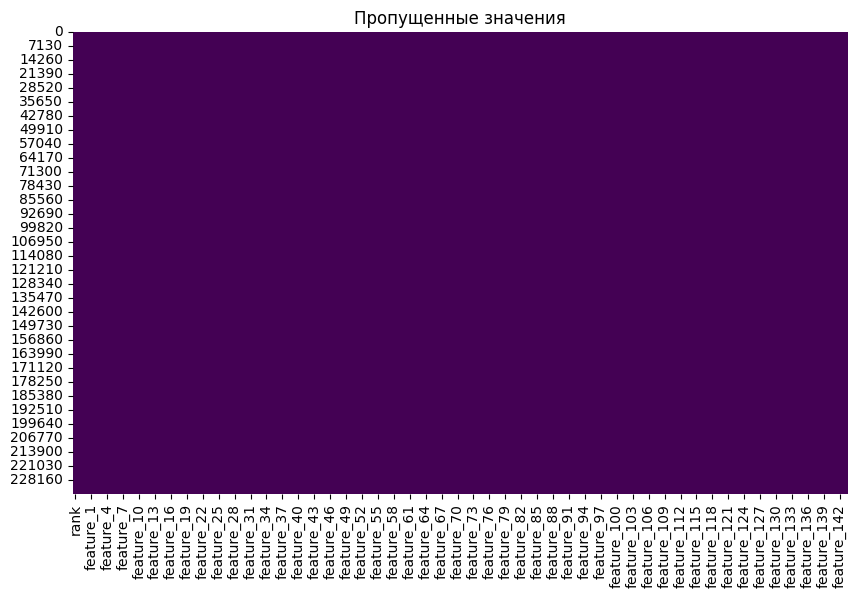

In [ ]:
# Подсчет количества пропущенных значений по каждому признаку
missing_values = df.isnull().sum()
print(missing_values)

# Визуализация пропущенных значений с помощью тепловой карты
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Пропущенные значения')
plt.show()


Оценка распределения значений признаков:

/var/folders/17/gx9shr111892mg1s5nnz003h0000gn/T/ipykernel_4964/1400862610.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


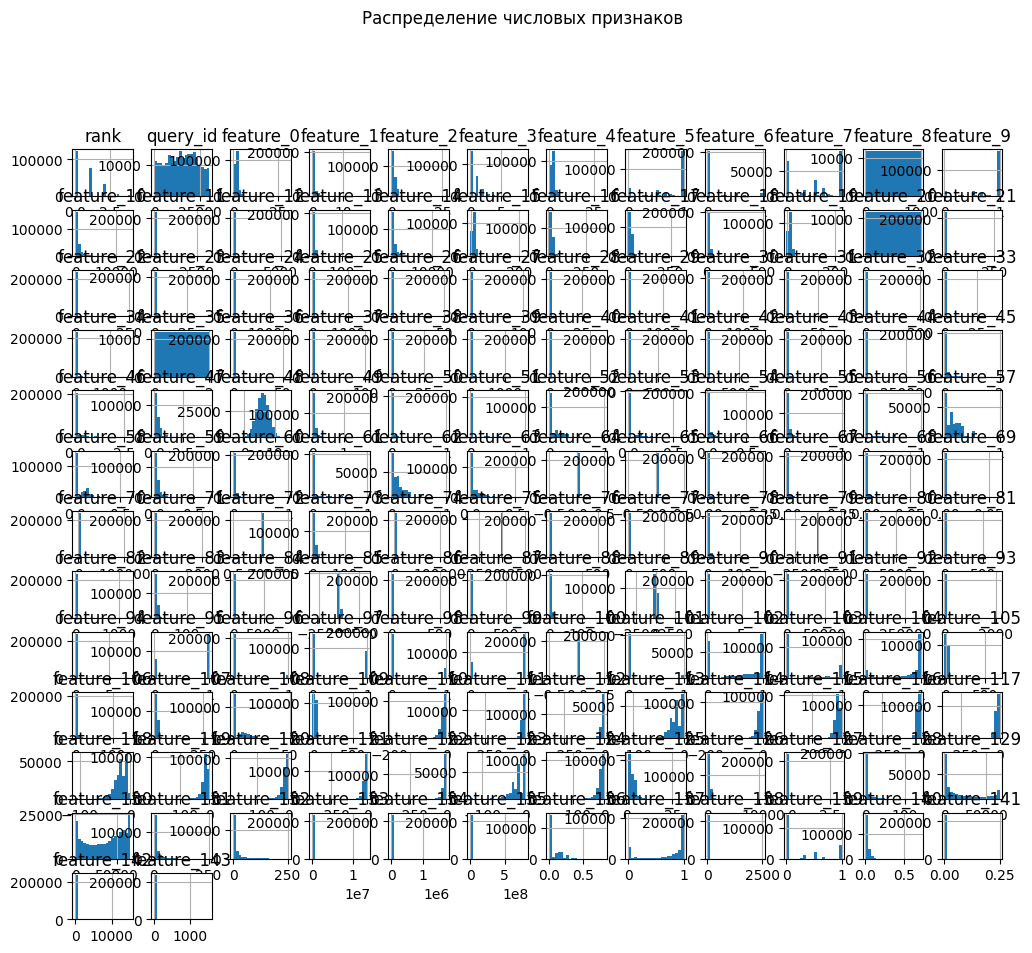

In [ ]:
# Визуализация распределения числовых признаков
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Распределение числовых признаков', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

# Визуализация распределения категориальных признаков
for column in df.select_dtypes(include=['object']):
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Распределение значений признака {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.xticks(rotation=45)
    plt.show()



3. **Подготовка данных**: При необходимости выполним предобработку данных, такую как обработку пропущенных значений, кодирование категориальных признаков, масштабирование признаков и т.д.


In [3]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop(columns=['rank', 'query_id'])
y = df['rank']

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Шаг 2: Обучение модели ранжирования



1. **Выбор модели**: Выберем модель для ранжирования данных. Это может быть, например, градиентный бустинг, случайный лес, или модель глубокого обучения, такая как нейронная сеть.


In [4]:
# Создание модели RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)


2. **Разделение данных**: Разделим данные на обучающий и тестовый наборы. Обычно используется метод кросс-валидации для оценки качества модели.


In [5]:
# Разделение отмасштабированных данных на обучающий и тестовый наборы
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

3. **Тюнинг модели**: При необходимости отрегулируем гиперпараметры модели для улучшения её производительности.

In [ ]:
# Определение сетки параметров для подбора
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Подбор оптимальных гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Вывод наилучших гиперпараметров
print("Наилучшие гиперпараметры:", grid_search.best_params_)

4. **Обучение модели**: Обучим выбранную модель на обучающем наборе данных.

In [3]:
# Получение наилучшей модели
best_model = grid_search.best_estimator_

# Обучение наилучшей модели на всем обучающем наборе
best_model.fit(X_train_scaled, y_train)

# Предсказание рангов на тестовом наборе
y_pred = best_model.predict(X_test_scaled)

AttributeError: 'dict' object has no attribute 'best_estimator_'


### Шаг 3: Оценка модели



1. **Оценка качества модели**: Оценим качество модели на тестовом наборе данных, используя метрики ранжирования, такие как Normalized Discounted Cumulative Gain (NDCG), Mean Average Precision (MAP) и т.д.


In [ ]:
# Вычисление метрики ранжирования NDCG@5
ndcg_5 = ndcg_score(np.expand_dims(y_test, axis=0), np.expand_dims(y_pred, axis=0), k=5)
print("NDCG@5 на тестовом наборе данных с улучшенной моделью:", ndcg_5)


### Шаг 4: Выводы и заключение



1. **Сводка результатов**: Подведем итоги проведенного анализа и оценки модели.



2. **Рекомендации**: Если есть, предложим рекомендации по дальнейшим действиям, таким как улучшение модели, дополнительный анализ данных и т.д.



3. **Заключение**: Заключим проект, подчеркнув его важность и результаты, достигнутые в процессе.

